In [153]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [154]:
data = sklearn.datasets.make_classification(
    n_samples=10000, 
    n_features=5,  
    n_classes=2
)

X = data[0]
y = data[1]
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df['y'] = y
df["y"].value_counts()

y
0    5000
1    5000
Name: count, dtype: int64

In [155]:
df.describe()

,x1,x2,x3,x4,x5,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.000799,-0.005431,-0.001562,-0.003060,0.005873,0.500000
std,0.989314,1.467616,0.395782,1.328214,1.673880,0.500025
min,-3.777443,-5.454205,-1.534418,-4.254421,-7.601429,0.000000
25%,-0.662701,-1.062542,-0.224425,-1.062182,-0.815394,0.000000
50%,-0.005458,0.076008,-0.009668,-0.038001,-0.119144,0.500000
75%,0.648768,1.078953,0.217632,1.010996,1.078859,1.000000
max,3.603449,4.110126,1.631044,5.642000,5.752481,1.000000


In [156]:
# Dividir datos en entrenamiento y  prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [157]:
# Red
class RedNeuronal:
    # Inicialización 
    def __init__(self, layers):
        self.layers = layers
        self.weights = []
        self.biases = []
        self.weightsΔ = []
        self.biasesΔ = []

        # Inicialización de pesos y biases aleatorios
        for i in range(len(layers) - 1):
            # Pesos: matriz de (neuronas capa actual, neuronas capa siguiente)
            w = np.random.randn(layers[i], layers[i+1])
            b = np.zeros((1, layers[i+1]))
            self.weights.append(w)
            self.biases.append(b)

        # Initialize each Δw and Δb to zero.
        for i in range(len(self.layers) - 1):
            wΔ = np.zeros((self.layers[i], self.layers[i+1]))
            bΔ = np.zeros((1, self.layers[i+1]))
            self.weightsΔ.append(wΔ)
            self.biasesΔ.append(bΔ)

    # Mostrar pesos
    def show_weights(self):
        for i in range(len(self.layers)-1):
            print(f"Capa {i+1}-{i+2}")
            print("Weights: ", self.weights[i],"Bias: ",self.biases[i])

    #Función de activación sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Feedforward
    def predict(self, X):
        a = X
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a, w) + b
            a = self.sigmoid(z)
        return a

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # Feedforward
            a = self.predict(X)

            # loss (MSE)
            loss = np.mean((a - y) ** 2)

            # Backward pass (gradient descent)
            self.backward(X, y, a, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def backward(self, X, y, a, learning_rate):
        # Paso 1: forward con almacenamiento de activaciones y z
        activations = [X]
        zs = []  # valores antes de activación

        a_tmp = X
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a_tmp, w) + b
            zs.append(z)
            a_tmp = self.sigmoid(z)
            activations.append(a_tmp)

        # Paso 2: error de salida
        delta = (activations[-1] - y) * (activations[-1] * (1 - activations[-1]))

        # Gradientes de última capa
        nabla_w = [np.dot(activations[-2].T, delta)]
        nabla_b = [np.sum(delta, axis=0, keepdims=True)]

        # Paso 3: backpropagation en capas ocultas
        for l in range(2, len(self.layers)):
            z = zs[-l]
            sp = activations[-l] * (1 - activations[-l])  # derivada de sigmoide
            delta = np.dot(delta, self.weights[-l+1].T) * sp
            nabla_w.insert(0, np.dot(activations[-l-1].T, delta))
            nabla_b.insert(0, np.sum(delta, axis=0, keepdims=True))

        # Paso 4: actualizar pesos y biases
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * nabla_w[i]
            self.biases[i] -= learning_rate * nabla_b[i]


In [158]:
capas = [5,       # Capa de entrada
       3,5,3,   # Capas ocultas
       1]       # Capa de salida
red = RedNeuronal(capas)
print("Pesos iniciales (antes de entrenamiento):")
red.show_weights()

Pesos iniciales (antes de entrenamiento):
Capa 1-2
Weights:  [[ 1.21778445  0.94373227 -1.38114861]
 [-0.64530299 -0.54601695 -0.33686472]
 [ 0.0039201   0.38560197 -2.05066129]
 [-0.96920454 -1.63433258 -0.63466247]
 [-2.29191326  0.86592163  1.43452657]] Bias:  [[0. 0. 0.]]
Capa 2-3
Weights:  [[ 0.37058394 -1.89759414  0.63927318  0.22867582 -1.50559654]
 [ 0.43641531 -0.93693064  0.31751423  0.07738072  0.55407313]
 [ 1.09604556 -1.6105572   0.88704717  0.13602374 -1.44058767]] Bias:  [[0. 0. 0. 0. 0.]]
Capa 3-4
Weights:  [[-0.4365624  -2.52021553  0.8231663 ]
 [ 0.46292596  1.71154177 -1.22372743]
 [-0.82703551 -0.28585238  0.09522276]
 [-1.75766014  1.05360922 -0.62680183]
 [ 1.20493678  0.92092122  0.44663281]] Bias:  [[0. 0. 0.]]
Capa 4-5
Weights:  [[-0.48026931]
 [ 0.55956224]
 [-1.217298  ]] Bias:  [[0.]]



Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.50      1.00      0.66      3982
     Clase 1       0.00      0.00      0.00      4018

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000



c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

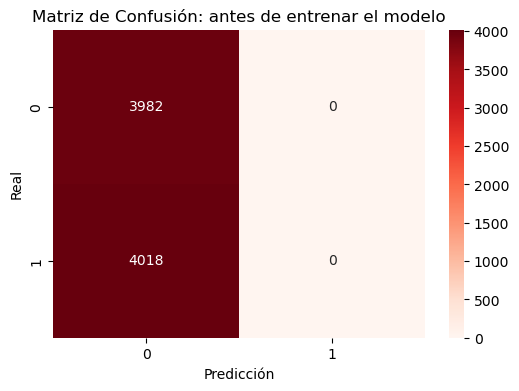

In [159]:
y_pred = (red.predict(x_train) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_train, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: antes de entrenar el modelo")
plt.show()

In [160]:
red.fit(x_train, y_train.reshape(-1, 1), epochs=1001, learning_rate=0.01)

Epoch 0, Loss: 0.26504595239921075
Epoch 100, Loss: 0.07552538147568362
Epoch 200, Loss: 0.07513259217717058
Epoch 300, Loss: 0.06752835931545569
Epoch 400, Loss: 0.0655707882709816
Epoch 500, Loss: 0.06485520177596951
Epoch 600, Loss: 0.06456687366788429
Epoch 700, Loss: 0.06437905698849533
Epoch 800, Loss: 0.06424635936323123
Epoch 900, Loss: 0.06415407399150753
Epoch 1000, Loss: 0.0640841608955964


In [161]:
print("Pesos finales (despues de entrenamiento):")
red.show_weights()

Pesos finales (despues de entrenamiento):
Capa 1-2
Weights:  [[-2.23132407e-01 -1.98207371e-01  6.83058172e-04]
 [-2.21761821e+00  6.28540419e+00 -1.15603162e+00]
 [-5.26974683e-02  1.32826159e+00 -2.05237393e+00]
 [ 7.38598455e-01 -4.48506692e+00  4.37329920e-01]
 [-3.17014388e+00  1.39291801e-01  7.95812307e-01]] Bias:  [[-1.90814581 -5.82403729 -1.51032021]]
Capa 2-3
Weights:  [[-4.49131857  2.32901158 -1.55597535  3.4519492  -1.4204739 ]
 [ 4.38545177 -4.04002801  0.79649902 -3.22328673 -0.380347  ]
 [ 3.7040231  -2.61273088  0.91516768 -1.60949107 -2.33403586]] Bias:  [[-1.36816157  1.10322376 -1.06102843 -0.95881982 -1.13975695]]
Capa 3-4
Weights:  [[-1.03158359 -5.58319894  2.47502367]
 [ 0.14644825  2.11388691 -3.43775443]
 [-1.43104043 -1.8260668   0.03094142]
 [-2.23857254  2.9819107  -2.77675195]
 [ 1.0255844   0.20470341  0.33083799]] Bias:  [[-1.10781349 -1.92810251 -1.19724342]]
Capa 4-5
Weights:  [[-0.20063681]
 [ 5.05070922]
 [-4.02397622]] Bias:  [[-1.15033393]]



Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.88      0.96      0.92      3982
     Clase 1       0.96      0.87      0.91      4018

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



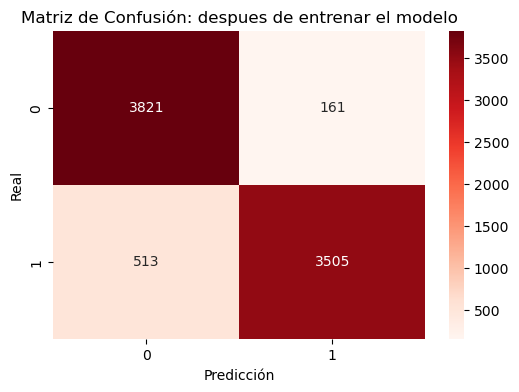

In [162]:
y_pred = (red.predict(x_train) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_train, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: despues de entrenar el modelo")
plt.show()


Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.89      0.97      0.93      1018
     Clase 1       0.96      0.87      0.92       982

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



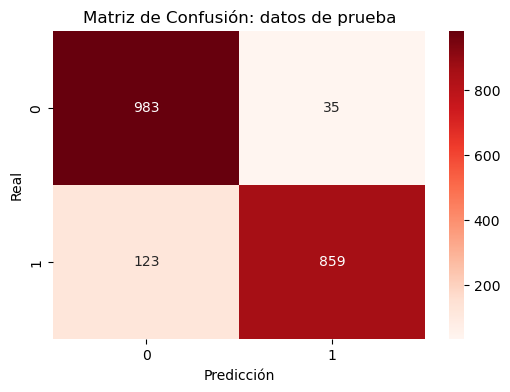

In [163]:
y_pred = (red.predict(x_test) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: datos de prueba")
plt.show()

In [164]:
!jupyter nbconvert --to script practica.ipynb


[NbConvertApp] Converting notebook practica.ipynb to script
[NbConvertApp] Writing 5878 bytes to practica.py
